In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path file CSV ada di folder yang sama dengan notebook
file_path = 'penjualan_produk.csv' # Cukup nama file saja
df = pd.read_csv(file_path) # Gunakan variabel file_path

print("5 baris pertama data:")
print(df.head())

print("\nInformasi dasar data:")
df.info()

5 baris pertama data:
      tanggal    produk  jumlah_terjual  harga_satuan  total_penjualan  \
0  2024-01-01    Laptop               5          1000             5000   
1  2024-01-01     Mouse              20            25              500   
2  2024-01-02  Keyboard              10            75              750   
3  2024-01-02   Monitor               3           200              600   
4  2024-01-03    Laptop               7          1000             7000   

   wilayah  
0    Barat  
1    Timur  
2    Utara  
3  Selatan  
4    Barat  

Informasi dasar data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tanggal          8 non-null      object
 1   produk           8 non-null      object
 2   jumlah_terjual   8 non-null      int64 
 3   harga_satuan     8 non-null      int64 
 4   total_penjualan  8 non-null      int64 
 5   wilayah     

In [2]:
print("\nBentuk data (baris, kolom):", df.shape)
print("\nStatistik Deskriptif:")
print(df.describe())
print("\nJumlah nilai hilang per kolom:")
print(df.isnull().sum())
print("\nNilai unik di kolom 'produk':", df['produk'].unique())
print("Nilai unik di kolom 'wilayah':", df['wilayah'].unique())


Bentuk data (baris, kolom): (8, 6)

Statistik Deskriptif:
       jumlah_terjual  harga_satuan  total_penjualan
count          8.0000      8.000000          8.00000
mean           9.0000    325.000000       1953.12500
std            5.8554    422.154339       2557.77657
min            3.0000     25.000000        375.00000
25%            4.7500     62.500000        575.00000
50%            7.5000    137.500000        675.00000
75%           11.2500    400.000000       1850.00000
max           20.0000   1000.000000       7000.00000

Jumlah nilai hilang per kolom:
tanggal            0
produk             0
jumlah_terjual     0
harga_satuan       0
total_penjualan    0
wilayah            0
dtype: int64

Nilai unik di kolom 'produk': ['Laptop' 'Mouse' 'Keyboard' 'Monitor']
Nilai unik di kolom 'wilayah': ['Barat' 'Timur' 'Utara' 'Selatan']


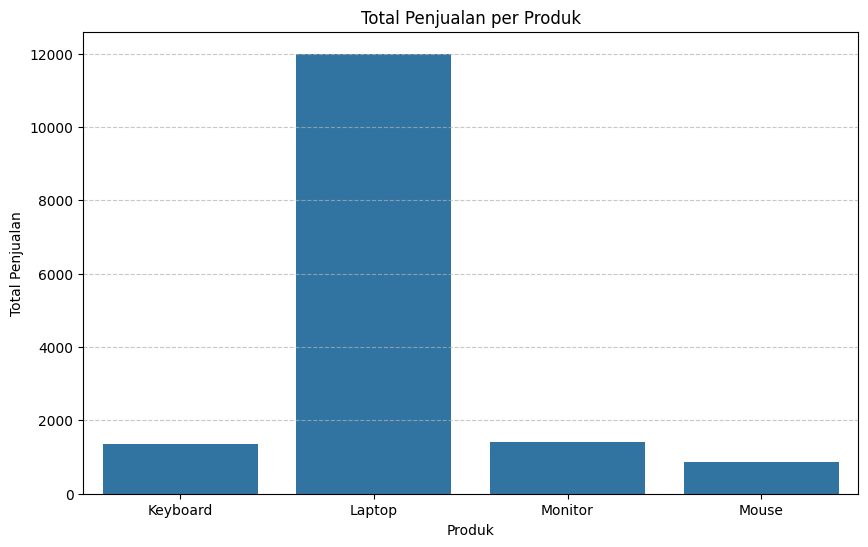

In [6]:
penjualan_per_produk = df.groupby('produk')['total_penjualan'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='produk', y='total_penjualan', data=penjualan_per_produk)
plt.title('Total Penjualan per Produk')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

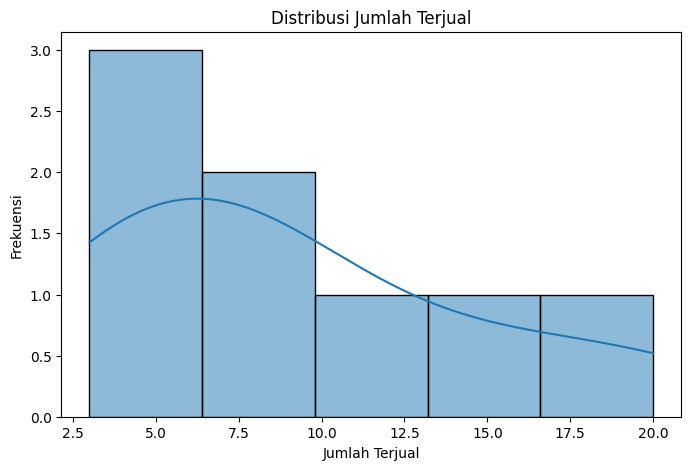

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['jumlah_terjual'], bins=5, kde=True)
plt.title('Distribusi Jumlah Terjual')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Frekuensi')
plt.show()

In [8]:
print("Tipe data awal setiap kolom:")
print(df.dtypes)

# Mengonversi kolom 'tanggal' menjadi tipe datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

print("\nTipe data setelah konversi 'tanggal':")
print(df.dtypes)

Tipe data awal setiap kolom:
tanggal            object
produk             object
jumlah_terjual      int64
harga_satuan        int64
total_penjualan     int64
wilayah            object
dtype: object

Tipe data setelah konversi 'tanggal':
tanggal            datetime64[ns]
produk                     object
jumlah_terjual              int64
harga_satuan                int64
total_penjualan             int64
wilayah                    object
dtype: object


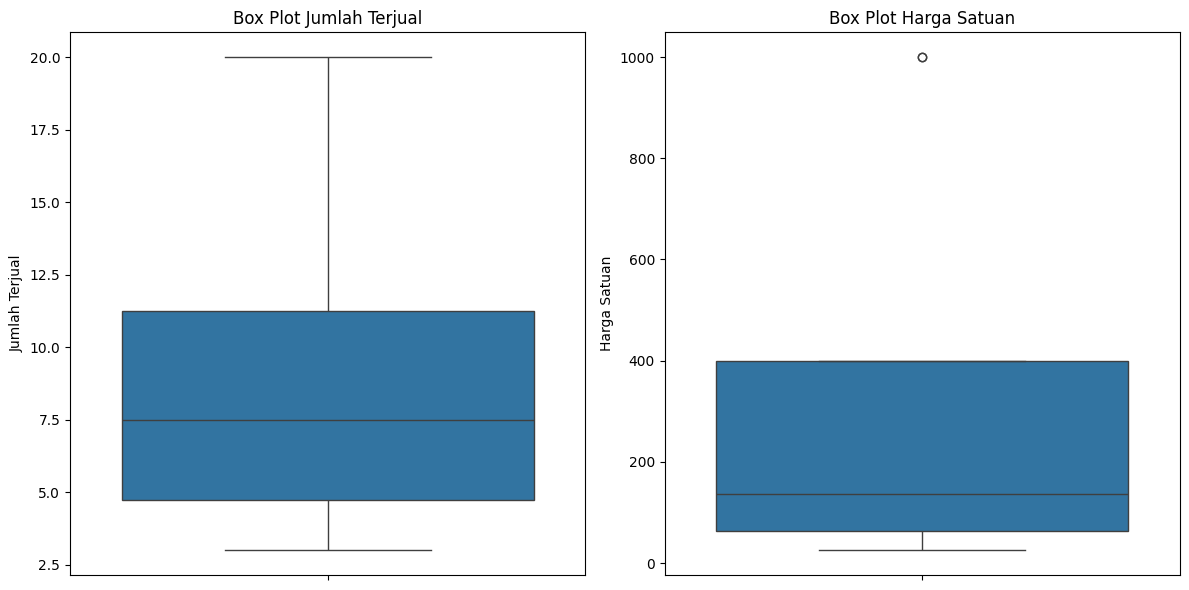

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # Membuat grid 1 baris, 2 kolom, dan ini subplot pertama
sns.boxplot(y=df['jumlah_terjual'])
plt.title('Box Plot Jumlah Terjual')
plt.ylabel('Jumlah Terjual')

plt.subplot(1, 2, 2) # Ini subplot kedua
sns.boxplot(y=df['harga_satuan'])
plt.title('Box Plot Harga Satuan')
plt.ylabel('Harga Satuan')

plt.tight_layout() # Merapikan layout agar tidak tumpang tindih
plt.show()


Matriks Korelasi:
                  jumlah_terjual  harga_satuan  total_penjualan
jumlah_terjual         1.000000     -0.449339        -0.321449
harga_satuan          -0.449339      1.000000         0.969116
total_penjualan       -0.321449      0.969116         1.000000


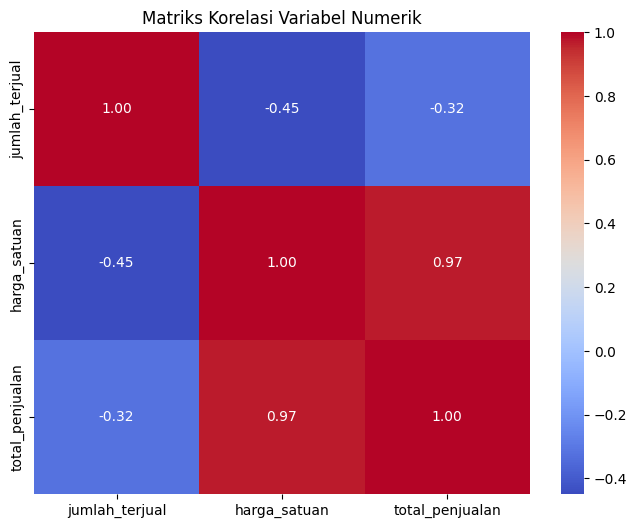

In [10]:
# Pilih hanya kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi
correlation_matrix = numeric_df.corr()
print("\nMatriks Korelasi:\n", correlation_matrix)

# Visualisasikan matriks korelasi dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()


Rata-rata total penjualan per wilayah:
    wilayah  total_penjualan
0    Barat           6000.0
1  Selatan            700.0
2    Timur            550.0
3    Utara            562.5


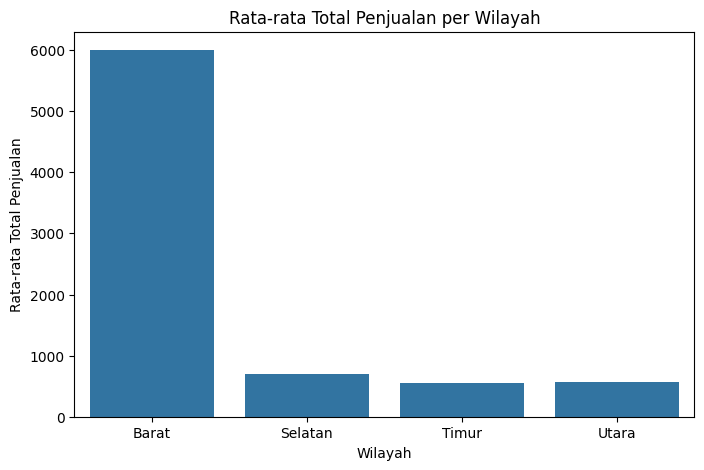

In [11]:
# Agregasi data: rata-rata total penjualan per wilayah
avg_penjualan_per_wilayah = df.groupby('wilayah')['total_penjualan'].mean().reset_index()
print("\nRata-rata total penjualan per wilayah:\n", avg_penjualan_per_wilayah)

plt.figure(figsize=(8, 5))
sns.barplot(x='wilayah', y='total_penjualan', data=avg_penjualan_per_wilayah)
plt.title('Rata-rata Total Penjualan per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Rata-rata Total Penjualan')
plt.show()

In [12]:
# Agregasi data: total penjualan per tanggal
penjualan_harian = df.groupby('tanggal')['total_penjualan'].sum().reset_index()

# Tampilkan hasil agregasi
print(penjualan_harian)


     tanggal  total_penjualan
0 2024-01-01             5500
1 2024-01-02             1350
2 2024-01-03             7375
3 2024-01-04             1400


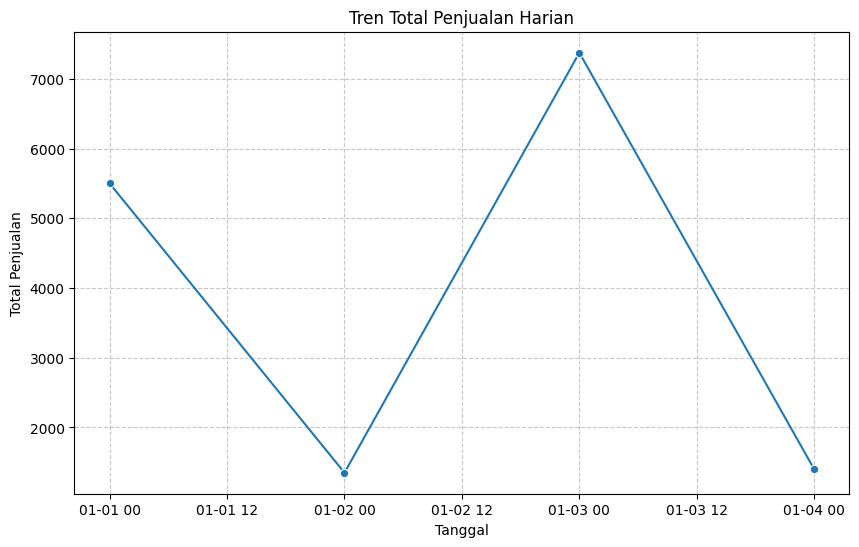

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='tanggal', y='total_penjualan', data=penjualan_harian, marker='o')
plt.title('Tren Total Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [14]:
# Agregasi data: total jumlah terjual per produk
jumlah_per_produk = df.groupby('produk')['jumlah_terjual'].sum().reset_index()

# Tampilkan hasil agregasi
print(jumlah_per_produk)


     produk  jumlah_terjual
0  Keyboard              18
1    Laptop              12
2   Monitor               7
3     Mouse              35


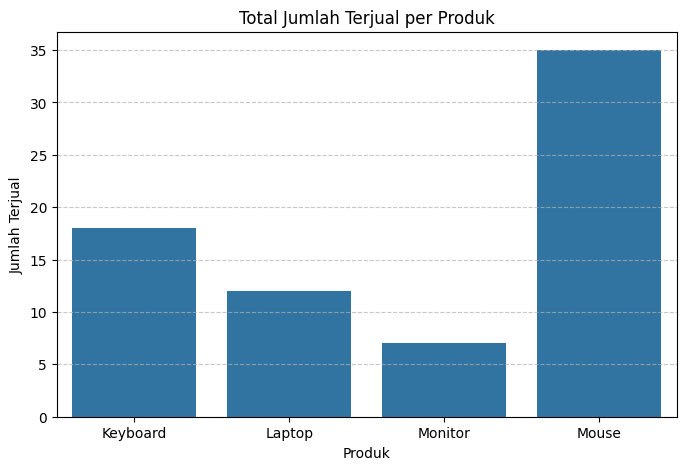

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(x='produk', y='jumlah_terjual', data=jumlah_per_produk)
plt.title('Total Jumlah Terjual per Produk')
plt.xlabel('Produk')
plt.ylabel('Jumlah Terjual')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



2025-06-22 11:34:13.343 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 11:34:13.344 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 11:34:14.080 
  command:

    streamlit run c:\Users\fatha\Documents\analisis_data_python\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-22 11:34:14.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 11:34:14.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 11:34:14.083 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 11:34:14.083 Thread 'MainThread': missing ScriptRunContext! This warnin

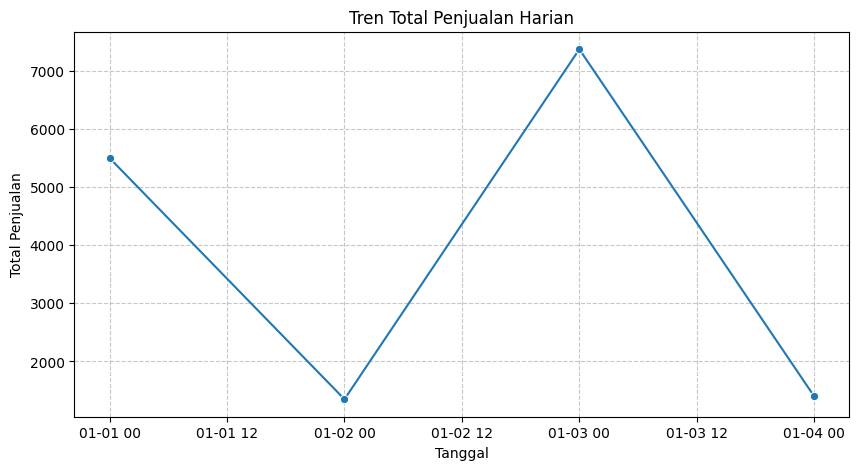

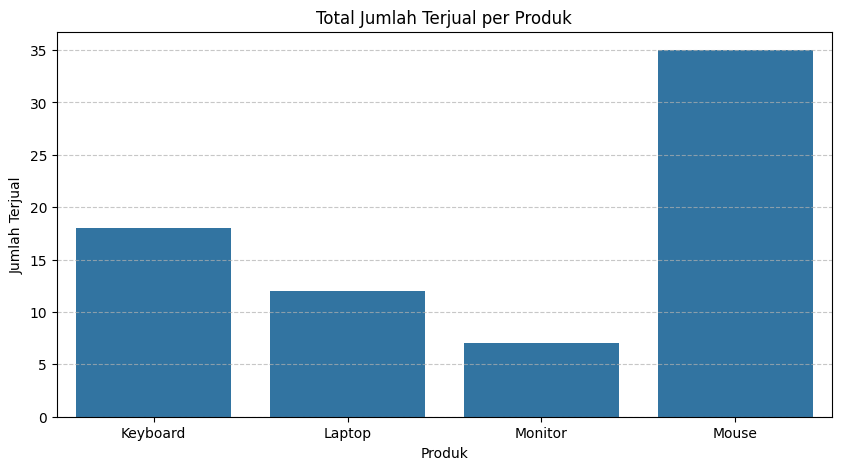

In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Konfigurasi Halaman (Opsional) ---
st.set_page_config(layout="wide") # Mengatur layout agar lebih lebar

# --- 2. Judul Dashboard ---
st.title('Dashboard Analisis Penjualan Produk 📈')
st.markdown('Aplikasi sederhana untuk melihat tren dan performa penjualan.')

# --- 3. Muat Data ---
# Pastikan file CSV ada di folder yang sama dengan dashboard_penjualan.py
file_path = 'penjualan_produk.csv'
try:
    df = pd.read_csv(file_path)
    # Konversi kolom 'tanggal' ke datetime
    df['tanggal'] = pd.to_datetime(df['tanggal'])
except FileNotFoundError:
    st.error(f"Error: File '{file_path}' tidak ditemukan. Pastikan CSV ada di folder yang sama.")
    st.stop() # Hentikan eksekusi jika file tidak ditemukan
except pd.errors.EmptyDataError:
    st.error(f"Error: File '{file_path}' kosong atau tidak memiliki kolom.")
    st.stop()

# --- 4. Tampilkan Ringkasan Data Awal ---
st.subheader('Sekilas Data Penjualan')
st.dataframe(df.head()) # Menampilkan 5 baris pertama data dalam tabel interaktif

# --- 5. Filter Interaktif (Sidebar) ---
st.sidebar.header('Filter Data')

# Filter berdasarkan Wilayah
all_wilayah = ['Semua'] + list(df['wilayah'].unique())
selected_wilayah = st.sidebar.selectbox('Pilih Wilayah:', all_wilayah)

# Filter berdasarkan Produk
all_produk = ['Semua'] + list(df['produk'].unique())
selected_produk = st.sidebar.selectbox('Pilih Produk:', all_produk)

# Terapkan Filter
filtered_df = df.copy() # Buat salinan agar tidak mengubah DataFrame asli

if selected_wilayah != 'Semua':
    filtered_df = filtered_df[filtered_df['wilayah'] == selected_wilayah]

if selected_produk != 'Semua':
    filtered_df = filtered_df[filtered_df['produk'] == selected_produk]

# --- 6. Visualisasi ---

st.header('Tren Penjualan & Performa Produk')

if filtered_df.empty:
    st.warning("Tidak ada data untuk kombinasi filter yang dipilih.")
else:
    # Grafik 1: Tren Total Penjualan Harian
    st.subheader('Tren Total Penjualan Harian')
    penjualan_harian = filtered_df.groupby('tanggal')['total_penjualan'].sum().reset_index()
    fig1, ax1 = plt.subplots(figsize=(10, 5)) # Buat figur Matplotlib
    sns.lineplot(x='tanggal', y='total_penjualan', data=penjualan_harian, marker='o', ax=ax1)
    ax1.set_title('Tren Total Penjualan Harian')
    ax1.set_xlabel('Tanggal')
    ax1.set_ylabel('Total Penjualan')
    ax1.grid(True, linestyle='--', alpha=0.7)
    st.pyplot(fig1) # Tampilkan figur Matplotlib di Streamlit

    st.markdown('---') # Garis pemisah

    # Grafik 2: Total Jumlah Terjual per Produk (untuk produk yang difilter)
    st.subheader('Total Jumlah Terjual per Produk')
    jumlah_per_produk = filtered_df.groupby('produk')['jumlah_terjual'].sum().reset_index()
    fig2, ax2 = plt.subplots(figsize=(10, 5))
    sns.barplot(x='produk', y='jumlah_terjual', data=jumlah_per_produk, ax=ax2)
    ax2.set_title('Total Jumlah Terjual per Produk')
    ax2.set_xlabel('Produk')
    ax2.set_ylabel('Jumlah Terjual')
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    st.pyplot(fig2)